In [1]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt #Added matplotlib
from pathlib import Path
import numpy as np
import scipy.stats as stats
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Use Path to open csvs.
laws_path = Path('Resources/CDC_Nutrition__Physical_Activity__and_Obesity_-_Legislation.csv')
deaths_path = Path('Resources/NCHS_-_Leading_Causes_of_Death__United_States.csv')
pop_path = Path('Resources/sc-est2017-alldata5.csv')

In [3]:
# Use Pandas to the read Legislature data.
laws_df = pd.read_csv(laws_path)

# Cleaning Data Set
laws_df = laws_df.drop(columns = ['Quarter', 'DataSource', 'Comments', 'EnactedDate', 'EffectiveDate', 
                                  'GeoLocation', 'PolicyTypeID', 'HealthTopicID', 'PolicyTopicID', 'Title',
                                 'SettingID', 'ProvisionID', 'Citation','StatusAltValue','DataType','DisplayOrder'])
laws_df = laws_df.rename(columns={'LocationAbbr': 'StateAbbr',
                                 'LocationDesc': 'State'})

laws_df.head()

,Year,StateAbbr,State,HealthTopic,PolicyTopic,Setting,Status
0,2009,CO,Colorado,Nutrition,Appropriations,School/After School,Enacted
1,2010,KY,Kentucky,Obesity,Food Restrictions,Community,Enacted
2,2010,KY,Kentucky,Physical Activity,Bicycling,Community,Enacted
3,2010,TX,Texas,Obesity,Sugar Sweetened Beverages,Early Care and Education,Enacted
4,2009,CO,Colorado,Nutrition,Agriculture and Farming,Community,Enacted


In [4]:
# Use Pandas to the read Legislature data
deaths_df = pd.read_csv(deaths_path)
deaths_df = deaths_df.rename(columns={'113 Cause Name': 'Full Cause Name',
                                     'State':'NAME'})
deaths_df['Year'] = deaths_df['Year'].astype('str')

In [5]:
# Grouping the population data frame to get sums for each year 
pop_df = pd.read_csv(pop_path)
pop_df = pop_df.drop(columns=['SUMLEV','REGION','DIVISION','STATE','SEX','ORIGIN','RACE','AGE','CENSUS2010POP','ESTIMATESBASE2010'])
grouped_pop = pop_df.groupby(['NAME'])

# Cleaning the grouped data frame
grouped_pop = grouped_pop[['POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014',
                          'POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017']].sum()
grouped_pop = grouped_pop.rename(columns={'POPESTIMATE2010':'2010','POPESTIMATE2011':'2011','POPESTIMATE2012':'2012',
                                          'POPESTIMATE2013':'2013','POPESTIMATE2014':'2014','POPESTIMATE2015':'2015',
                                          'POPESTIMATE2016':'2016','POPESTIMATE2017':'2017'})
grouped_pop = grouped_pop.reset_index()

# Setting up a new data frame to be able to merge the population with the deaths
merge_pop = pd.melt(grouped_pop, id_vars=["NAME"], var_name='Year', value_name='Population')

In [6]:
# Merging the population and death Data Frames and calculating death
# as a percentage of population
merged_df = pd.merge(merge_pop,deaths_df, on=(['NAME','Year']),how='left')
merged_df['Death Percentage'] = (merged_df['Deaths'] / merged_df['Population'])
merged_df

,NAME,Year,Population,Full Cause Name,Cause Name,Deaths,Age-adjusted Death Rate,Death Percentage
0,Alabama,2010,19418292,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,2394,49.6,0.000123
1,Alabama,2010,19418292,All Causes,All causes,48038,939.7,0.002474
2,Alabama,2010,19418292,Alzheimer's disease (G30),Alzheimer's disease,1523,31.2,0.000078
3,Alabama,2010,19418292,Cerebrovascular diseases (I60-I69),Stroke,2619,51.6,0.000135
4,Alabama,2010,19418292,Chronic lower respiratory diseases (J40-J47),CLRD,2866,55.4,0.000148
...,...,...,...,...,...,...,...,...
4483,Wyoming,2017,2369120,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,1001,148.9,0.000423
4484,Wyoming,2017,2369120,Influenza and pneumonia (J09-J18),Influenza and pneumonia,115,17.5,0.000049
4485,Wyoming,2017,2369120,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,157,26.9,0.000066
4486,Wyoming,2017,2369120,Malignant neoplasms (C00-C97),Cancer,948,136.1,0.000400


In [7]:
#Filter df for only stroke for cause of death
stroke_df = merged_df.drop(merged_df[merged_df['Cause Name'] != 'Stroke'].index)
stroke_df = stroke_df.sort_values(by = ["NAME", "Year"])
stroke_df

,NAME,Year,Population,Full Cause Name,Cause Name,Deaths,Age-adjusted Death Rate,Death Percentage
3,Alabama,2010,19418292,Cerebrovascular diseases (I60-I69),Stroke,2619,51.6,0.000135
564,Alabama,2011,19481828,Cerebrovascular diseases (I60-I69),Stroke,2568,49.4,0.000132
1125,Alabama,2012,19554796,Cerebrovascular diseases (I60-I69),Stroke,2628,49.5,0.000134
1686,Alabama,2013,19620044,Cerebrovascular diseases (I60-I69),Stroke,2604,48.1,0.000133
2247,Alabama,2014,19679068,Cerebrovascular diseases (I60-I69),Stroke,2663,48.3,0.000135
...,...,...,...,...,...,...,...,...
2236,Wyoming,2013,2375636,Cerebrovascular diseases (I60-I69),Stroke,213,35.1,0.000090
2797,Wyoming,2014,2381044,Cerebrovascular diseases (I60-I69),Stroke,189,30.2,0.000079
3358,Wyoming,2015,2394136,Cerebrovascular diseases (I60-I69),Stroke,198,31.4,0.000083
3919,Wyoming,2016,2390424,Cerebrovascular diseases (I60-I69),Stroke,208,31.7,0.000087


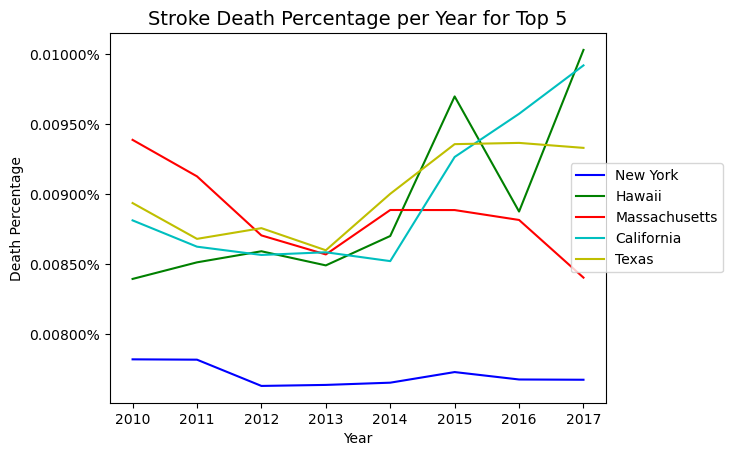

In [8]:
#Set parameters for state data
#Top 5 states for legislation passed
new_york = stroke_df.loc[stroke_df["NAME"]=="New York"]
hawaii = stroke_df.loc[stroke_df["NAME"]=="Hawaii"]
mass = stroke_df.loc[stroke_df["NAME"]=="Massachusetts"]
cali = stroke_df.loc[stroke_df["NAME"]=="California"]
texas = stroke_df.loc[stroke_df["NAME"]=="Texas"]

#Bottom 5 states for legislation passed
alaska = stroke_df.loc[stroke_df["NAME"]=="Alaska"]
wyoming = stroke_df.loc[stroke_df["NAME"]=="Wyoming"]
kansas = stroke_df.loc[stroke_df["NAME"]=="Kansas"]
s_dakota =stroke_df.loc[stroke_df["NAME"]=="South Dakota"]
n_dakota = stroke_df.loc[stroke_df["NAME"]=="North Dakota"]

#Make a line graph fot Top 5 states for stoke
plt.plot(new_york["Year"], new_york["Death Percentage"], color = "b", label = "New York")
plt.plot(hawaii["Year"], hawaii["Death Percentage"], color = "g", label = "Hawaii")
plt.plot(mass["Year"], mass["Death Percentage"], color = "r", label = "Massachusetts")
plt.plot(cali["Year"], cali["Death Percentage"], color = "c", label = "California")
plt.plot(texas["Year"], texas["Death Percentage"], color = "y", label = "Texas")
plt.title("Stroke Death Percentage per Year for Top 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()

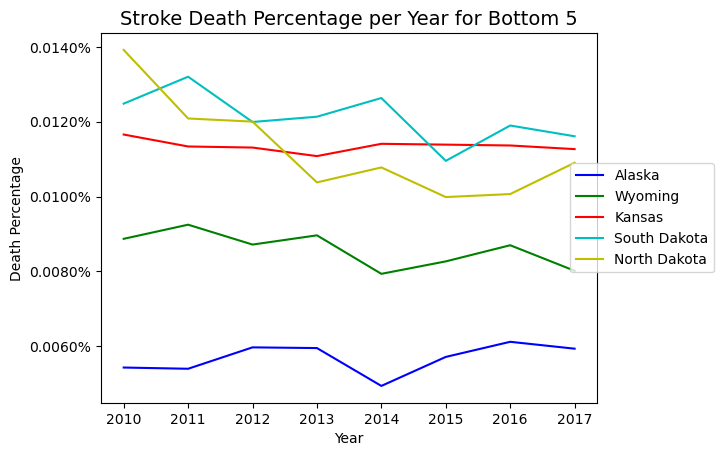

In [9]:
#Make line graph for bottom 5 states for stroke
plt.plot(alaska["Year"], alaska["Death Percentage"], color = "b", label = "Alaska")
plt.plot(wyoming["Year"], wyoming["Death Percentage"], color = "g", label = "Wyoming")
plt.plot(kansas["Year"], kansas["Death Percentage"], color = "r", label = "Kansas")
plt.plot(s_dakota["Year"], s_dakota["Death Percentage"], color = "c", label = "South Dakota")
plt.plot(n_dakota["Year"], n_dakota["Death Percentage"], color = "y", label = "North Dakota")
plt.title("Stroke Death Percentage per Year for Bottom 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()

In [10]:
# Grouping the laws data frame to get counts
grouped_laws = laws_df.sort_values(by = ['State','HealthTopic'])
grouped_laws = grouped_laws.groupby(['State','Year','HealthTopic'])

laws_per_year = grouped_laws.count()
laws_per_year = laws_per_year.drop(columns=['StateAbbr', 'PolicyTopic','Setting'])
laws_per_year = laws_per_year.rename(columns={'Status':'Count'})
laws_per_year

Count
State   Year HealthTopic             
Alabama 2001 Nutrition              8
        2002 Nutrition              8
        2003 Nutrition              1
             Physical Activity      2
        2004 Nutrition              3
...                               ...
Wyoming 2013 Nutrition              5
             Obesity                1
             Physical Activity      1
        2016 Physical Activity      1
        2017 Nutrition              2

[1372 rows x 1 columns]

In [11]:
#Filter df for only suicide for cause of death
suicide_df = merged_df.drop(merged_df[merged_df['Cause Name'] != 'Suicide'].index)
suicide_df = suicide_df.sort_values(by = ["NAME", "Year"])
suicide_df

,NAME,Year,Population,Full Cause Name,Cause Name,Deaths,Age-adjusted Death Rate,Death Percentage
8,Alabama,2010,19418292,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,679,14.0,0.000035
569,Alabama,2011,19481828,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,654,13.2,0.000034
1130,Alabama,2012,19554796,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,724,14.7,0.000037
1691,Alabama,2013,19620044,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,721,14.4,0.000037
2252,Alabama,2014,19679068,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,715,14.5,0.000036
...,...,...,...,...,...,...,...,...
2241,Wyoming,2013,2375636,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,129,21.5,0.000054
2802,Wyoming,2014,2381044,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,120,20.6,0.000050
3363,Wyoming,2015,2394136,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,157,28.0,0.000066
3924,Wyoming,2016,2390424,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,144,25.2,0.000060


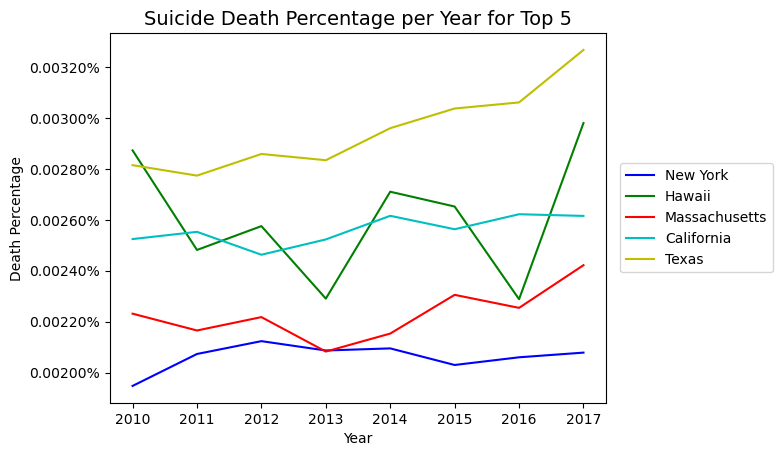

In [12]:
#Set parameters for state data
#Top 5 states for legislation passed
new_york = suicide_df.loc[suicide_df["NAME"]=="New York"]
hawaii = suicide_df.loc[suicide_df["NAME"]=="Hawaii"]
mass = suicide_df.loc[suicide_df["NAME"]=="Massachusetts"]
cali = suicide_df.loc[suicide_df["NAME"]=="California"]
texas = suicide_df.loc[suicide_df["NAME"]=="Texas"]

#Bottom 5 states for legislation passed
alaska = suicide_df.loc[suicide_df["NAME"]=="Alaska"]
wyoming = suicide_df.loc[suicide_df["NAME"]=="Wyoming"]
kansas = suicide_df.loc[suicide_df["NAME"]=="Kansas"]
s_dakota = suicide_df.loc[suicide_df["NAME"]=="South Dakota"]
n_dakota = suicide_df.loc[suicide_df["NAME"]=="North Dakota"]

#Make a line graph fot Top 5 states for suicide
plt.plot(new_york["Year"], new_york["Death Percentage"], color = "b", label = "New York")
plt.plot(hawaii["Year"], hawaii["Death Percentage"], color = "g", label = "Hawaii")
plt.plot(mass["Year"], mass["Death Percentage"], color = "r", label = "Massachusetts")
plt.plot(cali["Year"], cali["Death Percentage"], color = "c", label = "California")
plt.plot(texas["Year"], texas["Death Percentage"], color = "y", label = "Texas")
plt.title("Suicide Death Percentage per Year for Top 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

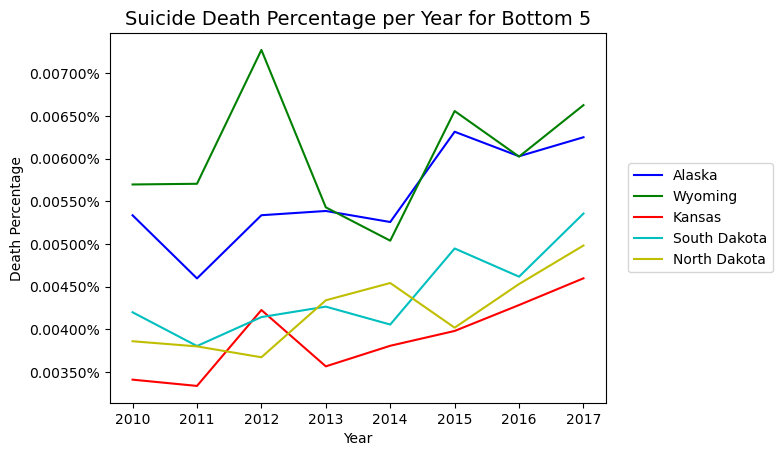

In [13]:
#Make line graph for bottom 5 states for suicide
plt.plot(alaska["Year"], alaska["Death Percentage"], color = "b", label = "Alaska")
plt.plot(wyoming["Year"], wyoming["Death Percentage"], color = "g", label = "Wyoming")
plt.plot(kansas["Year"], kansas["Death Percentage"], color = "r", label = "Kansas")
plt.plot(s_dakota["Year"], s_dakota["Death Percentage"], color = "c", label = "South Dakota")
plt.plot(n_dakota["Year"], n_dakota["Death Percentage"], color = "y", label = "North Dakota")
plt.title("Suicide Death Percentage per Year for Bottom 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

In [14]:
#Filter df for only kidney disease for cause of death
kidney_df = merged_df.drop(merged_df[merged_df['Cause Name'] != 'Kidney disease'].index)
kidney_df = kidney_df.sort_values(by = ["NAME", "Year"])
kidney_df

,NAME,Year,Population,Full Cause Name,Cause Name,Deaths,Age-adjusted Death Rate,Death Percentage
10,Alabama,2010,19418292,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,1184,23.1,0.000061
571,Alabama,2011,19481828,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,1047,20.0,0.000054
1132,Alabama,2012,19554796,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,1035,19.4,0.000053
1693,Alabama,2013,19620044,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,1057,19.3,0.000054
2254,Alabama,2014,19679068,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,1011,18.2,0.000051
...,...,...,...,...,...,...,...,...
2243,Wyoming,2013,2375636,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,56,9.4,0.000024
2804,Wyoming,2014,2381044,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,78,12.2,0.000033
3365,Wyoming,2015,2394136,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,86,13.3,0.000036
3926,Wyoming,2016,2390424,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,66,10.0,0.000028


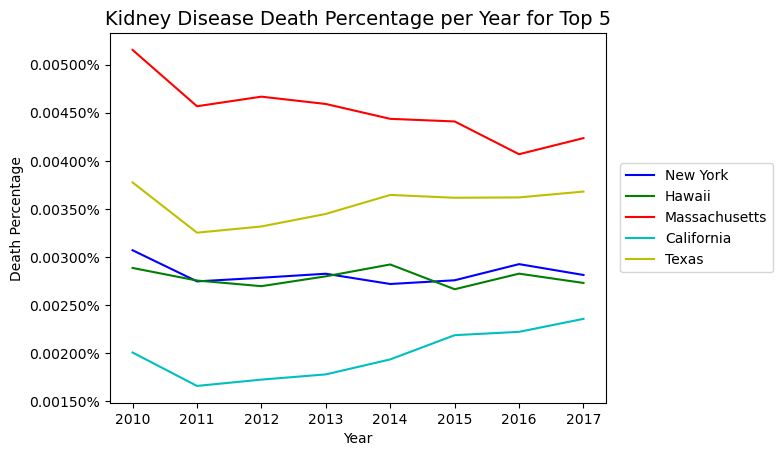

In [15]:
#Set parameters for state data
#Top 5 states for legislation passed
new_york = kidney_df.loc[kidney_df["NAME"]=="New York"]
hawaii = kidney_df.loc[kidney_df["NAME"]=="Hawaii"]
mass = kidney_df.loc[kidney_df["NAME"]=="Massachusetts"]
cali = kidney_df.loc[kidney_df["NAME"]=="California"]
texas = kidney_df.loc[kidney_df["NAME"]=="Texas"]

#Bottom 5 states for legislation passed
alaska = kidney_df.loc[kidney_df["NAME"]=="Alaska"]
wyoming = kidney_df.loc[kidney_df["NAME"]=="Wyoming"]
kansas = kidney_df.loc[kidney_df["NAME"]=="Kansas"]
s_dakota = kidney_df.loc[kidney_df["NAME"]=="South Dakota"]
n_dakota = kidney_df.loc[kidney_df["NAME"]=="North Dakota"]

#Make a line graph fot Top 5 states for kidney disease
plt.plot(new_york["Year"], new_york["Death Percentage"], color = "b", label = "New York")
plt.plot(hawaii["Year"], hawaii["Death Percentage"], color = "g", label = "Hawaii")
plt.plot(mass["Year"], mass["Death Percentage"], color = "r", label = "Massachusetts")
plt.plot(cali["Year"], cali["Death Percentage"], color = "c", label = "California")
plt.plot(texas["Year"], texas["Death Percentage"], color = "y", label = "Texas")
plt.title("Kidney Disease Death Percentage per Year for Top 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

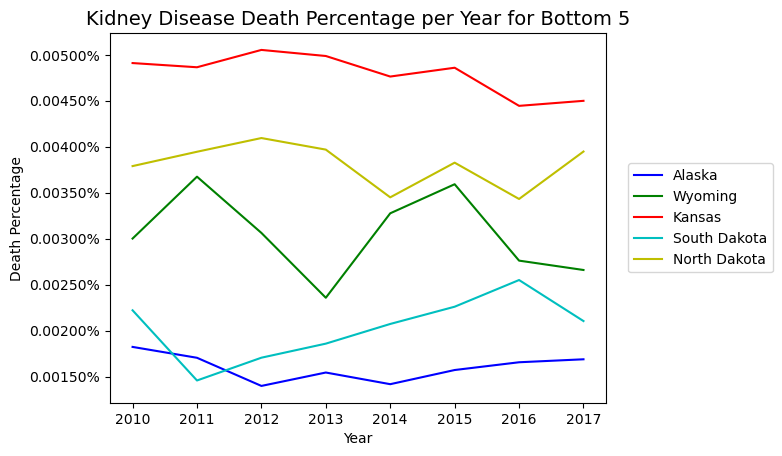

In [16]:
#Make line graph for bottom 5 states for kidney disease
plt.plot(alaska["Year"], alaska["Death Percentage"], color = "b", label = "Alaska")
plt.plot(wyoming["Year"], wyoming["Death Percentage"], color = "g", label = "Wyoming")
plt.plot(kansas["Year"], kansas["Death Percentage"], color = "r", label = "Kansas")
plt.plot(s_dakota["Year"], s_dakota["Death Percentage"], color = "c", label = "South Dakota")
plt.plot(n_dakota["Year"], n_dakota["Death Percentage"], color = "y", label = "North Dakota")
plt.title("Kidney Disease Death Percentage per Year for Bottom 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

In [17]:
#Filter df for only heart disease for cause of death
heart_df = merged_df.drop(merged_df[merged_df['Cause Name'] != 'Heart disease'].index)
heart_df = heart_df.sort_values(by = ["NAME", "Year"])
heart_df

,NAME,Year,Population,Full Cause Name,Cause Name,Deaths,Age-adjusted Death Rate,Death Percentage
6,Alabama,2010,19418292,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,12083,236.0,0.000622
567,Alabama,2011,19481828,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,11942,228.7,0.000613
1128,Alabama,2012,19554796,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,12036,225.1,0.000616
1689,Alabama,2013,19620044,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,12472,228.4,0.000636
2250,Alabama,2014,19679068,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,12461,224.0,0.000633
...,...,...,...,...,...,...,...,...
2239,Wyoming,2013,2375636,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,939,152.4,0.000395
2800,Wyoming,2014,2381044,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,1035,162.2,0.000435
3361,Wyoming,2015,2394136,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,1030,159.4,0.000430
3922,Wyoming,2016,2390424,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,1051,157.8,0.000440


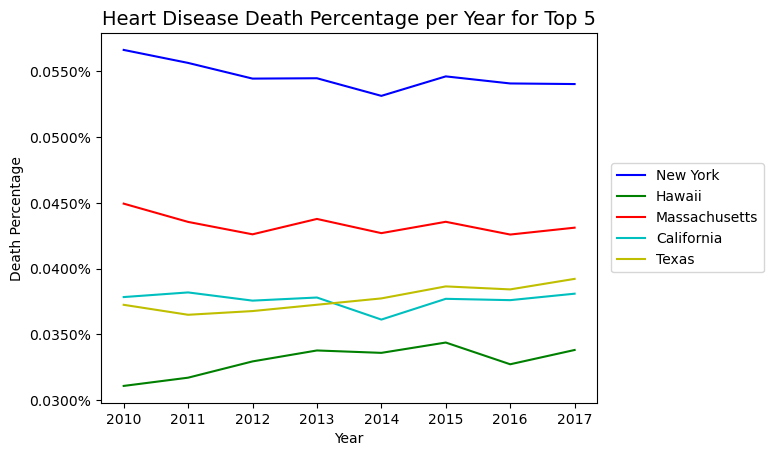

In [18]:
#Set parameters for state data
#Top 5 states for legislation passed
new_york = heart_df.loc[heart_df["NAME"]=="New York"]
hawaii = heart_df.loc[heart_df["NAME"]=="Hawaii"]
mass = heart_df.loc[heart_df["NAME"]=="Massachusetts"]
cali = heart_df.loc[heart_df["NAME"]=="California"]
texas = heart_df.loc[heart_df["NAME"]=="Texas"]

#Bottom 5 states for legislation passed
alaska = heart_df.loc[heart_df["NAME"]=="Alaska"]
wyoming = heart_df.loc[heart_df["NAME"]=="Wyoming"]
kansas = heart_df.loc[heart_df["NAME"]=="Kansas"]
s_dakota = heart_df.loc[heart_df["NAME"]=="South Dakota"]
n_dakota = heart_df.loc[heart_df["NAME"]=="North Dakota"]

#Make a line graph fot Top 5 states for Heart Disease
plt.plot(new_york["Year"], new_york["Death Percentage"], color = "b", label = "New York")
plt.plot(hawaii["Year"], hawaii["Death Percentage"], color = "g", label = "Hawaii")
plt.plot(mass["Year"], mass["Death Percentage"], color = "r", label = "Massachusetts")
plt.plot(cali["Year"], cali["Death Percentage"], color = "c", label = "California")
plt.plot(texas["Year"], texas["Death Percentage"], color = "y", label = "Texas")
plt.title("Heart Disease Death Percentage per Year for Top 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

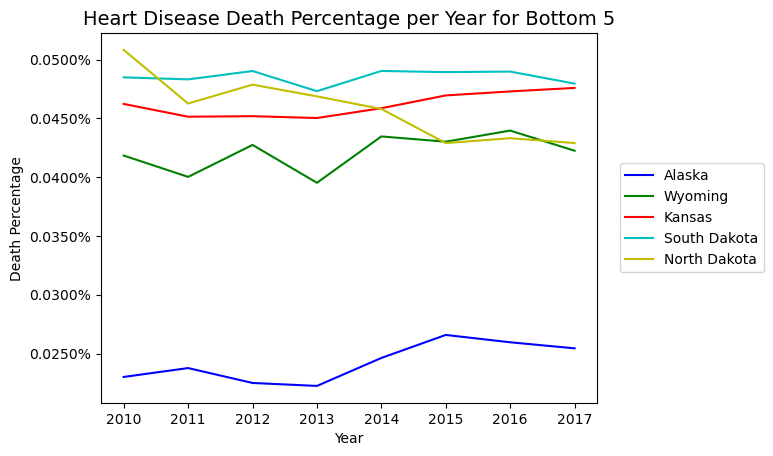

In [19]:
#Make line graph for bottom 5 states for heart disease
plt.plot(alaska["Year"], alaska["Death Percentage"], color = "b", label = "Alaska")
plt.plot(wyoming["Year"], wyoming["Death Percentage"], color = "g", label = "Wyoming")
plt.plot(kansas["Year"], kansas["Death Percentage"], color = "r", label = "Kansas")
plt.plot(s_dakota["Year"], s_dakota["Death Percentage"], color = "c", label = "South Dakota")
plt.plot(n_dakota["Year"], n_dakota["Death Percentage"], color = "y", label = "North Dakota")
plt.title("Heart Disease Death Percentage per Year for Bottom 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

In [20]:
#Filter df for only diabetes for cause of death
diabetes_df = merged_df.drop(merged_df[merged_df['Cause Name'] != 'Diabetes'].index)
diabetes_df = diabetes_df.sort_values(by = ["NAME", "Year"])
diabetes_df

,NAME,Year,Population,Full Cause Name,Cause Name,Deaths,Age-adjusted Death Rate,Death Percentage
5,Alabama,2010,19418292,Diabetes mellitus (E10-E14),Diabetes,1302,25.0,0.000067
566,Alabama,2011,19481828,Diabetes mellitus (E10-E14),Diabetes,1278,23.9,0.000066
1127,Alabama,2012,19554796,Diabetes mellitus (E10-E14),Diabetes,1300,23.9,0.000066
1688,Alabama,2013,19620044,Diabetes mellitus (E10-E14),Diabetes,1349,24.3,0.000069
2249,Alabama,2014,19679068,Diabetes mellitus (E10-E14),Diabetes,1281,22.8,0.000065
...,...,...,...,...,...,...,...,...
2238,Wyoming,2013,2375636,Diabetes mellitus (E10-E14),Diabetes,89,14.2,0.000037
2799,Wyoming,2014,2381044,Diabetes mellitus (E10-E14),Diabetes,110,17.6,0.000046
3360,Wyoming,2015,2394136,Diabetes mellitus (E10-E14),Diabetes,136,20.8,0.000057
3921,Wyoming,2016,2390424,Diabetes mellitus (E10-E14),Diabetes,112,16.6,0.000047


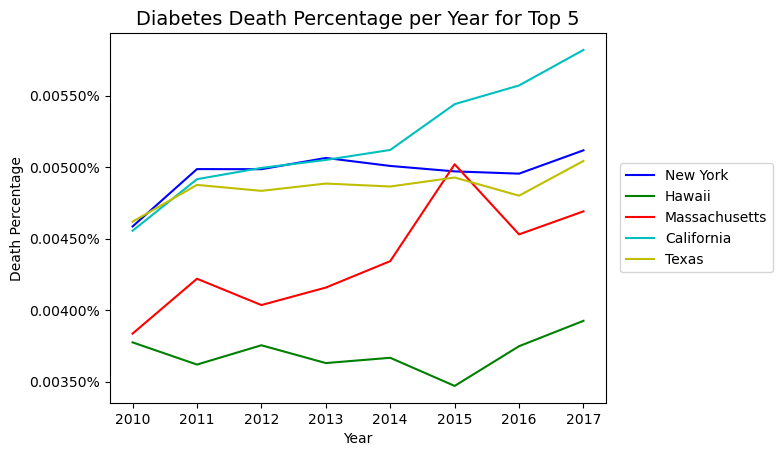

In [21]:
#Set parameters for state data
#Top 5 states for legislation passed
new_york = diabetes_df.loc[diabetes_df["NAME"]=="New York"]
hawaii = diabetes_df.loc[diabetes_df["NAME"]=="Hawaii"]
mass = diabetes_df.loc[diabetes_df["NAME"]=="Massachusetts"]
cali = diabetes_df.loc[diabetes_df["NAME"]=="California"]
texas = diabetes_df.loc[diabetes_df["NAME"]=="Texas"]

#Bottom 5 states for legislation passed
alaska = diabetes_df.loc[diabetes_df["NAME"]=="Alaska"]
wyoming = diabetes_df.loc[diabetes_df["NAME"]=="Wyoming"]
kansas = diabetes_df.loc[diabetes_df["NAME"]=="Kansas"]
s_dakota = diabetes_df.loc[diabetes_df["NAME"]=="South Dakota"]
n_dakota = diabetes_df.loc[diabetes_df["NAME"]=="North Dakota"]

#Make a line graph fot Top 5 states for Heart Disease
plt.plot(new_york["Year"], new_york["Death Percentage"], color = "b", label = "New York")
plt.plot(hawaii["Year"], hawaii["Death Percentage"], color = "g", label = "Hawaii")
plt.plot(mass["Year"], mass["Death Percentage"], color = "r", label = "Massachusetts")
plt.plot(cali["Year"], cali["Death Percentage"], color = "c", label = "California")
plt.plot(texas["Year"], texas["Death Percentage"], color = "y", label = "Texas")
plt.title("Diabetes Death Percentage per Year for Top 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

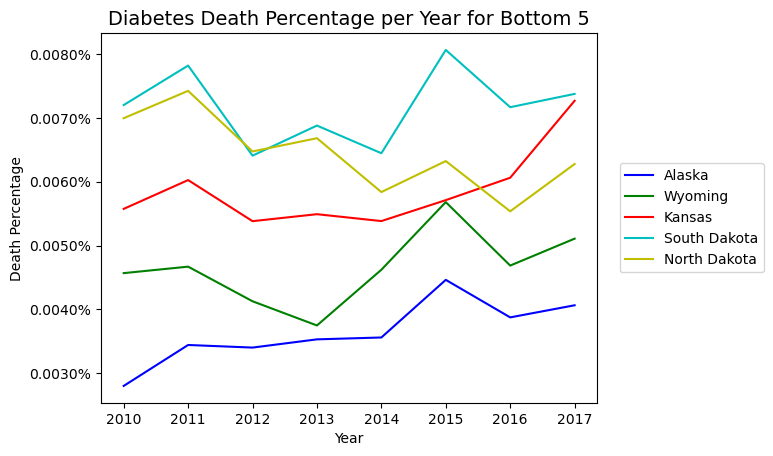

In [22]:
#Make line graph for bottom 5 states for heart disease
plt.plot(alaska["Year"], alaska["Death Percentage"], color = "b", label = "Alaska")
plt.plot(wyoming["Year"], wyoming["Death Percentage"], color = "g", label = "Wyoming")
plt.plot(kansas["Year"], kansas["Death Percentage"], color = "r", label = "Kansas")
plt.plot(s_dakota["Year"], s_dakota["Death Percentage"], color = "c", label = "South Dakota")
plt.plot(n_dakota["Year"], n_dakota["Death Percentage"], color = "y", label = "North Dakota")
plt.title("Diabetes Death Percentage per Year for Bottom 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

<Axes: title={'center': 'Death Percentage'}, xlabel='Year'>

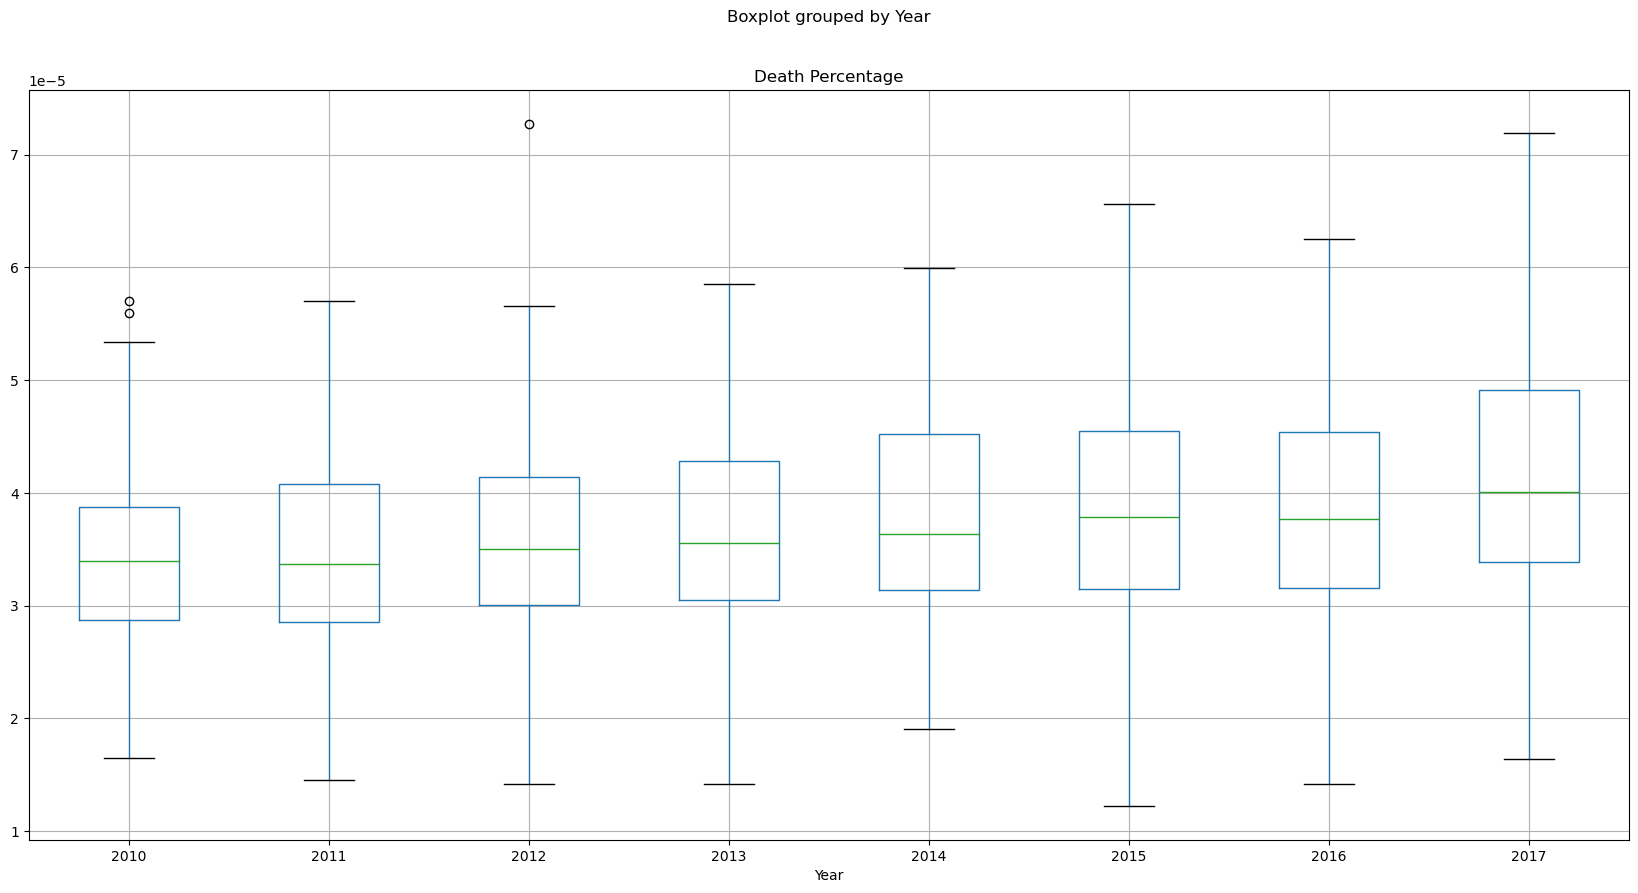

In [23]:
# Create a boxplot to compare means
suicide_df.boxplot("Death Percentage", by="Year", figsize=(20, 10))

<Axes: title={'center': 'Death Percentage'}, xlabel='Year'>

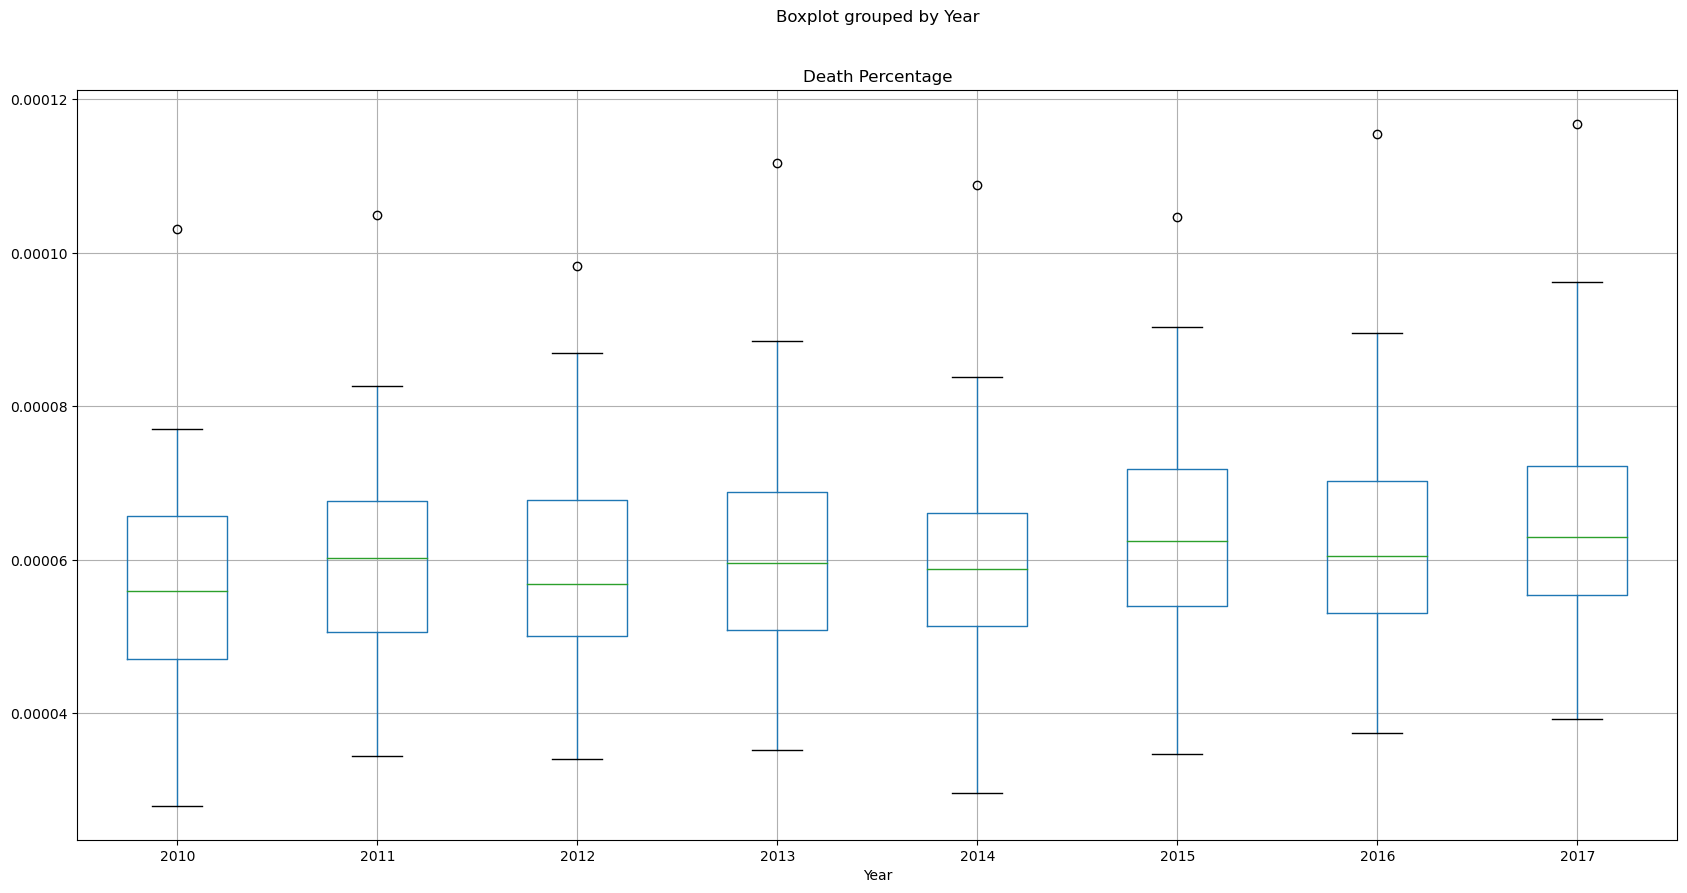

In [24]:
# Create a boxplot to compare means
diabetes_df.boxplot("Death Percentage", by="Year", figsize=(20, 10))

<Axes: title={'center': 'Death Percentage'}, xlabel='Year'>

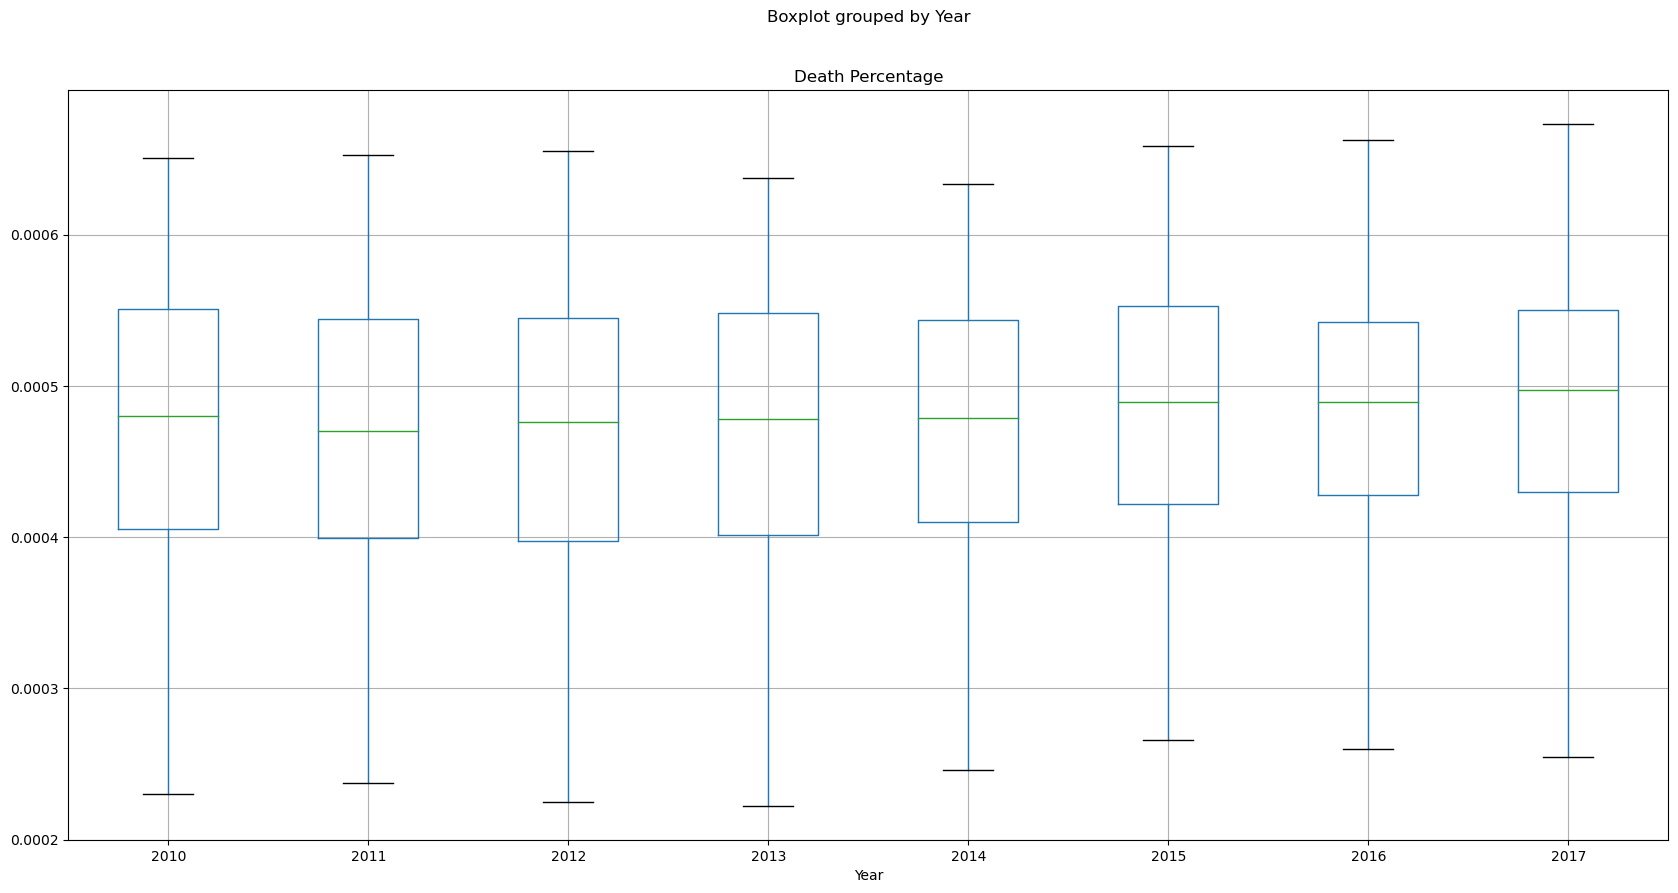

In [25]:
# Create a boxplot to compare means
heart_df.boxplot("Death Percentage", by="Year", figsize=(20, 10))

In [26]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = suicide_df.loc[suicide_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = suicide_df.loc[suicide_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2010"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2010"]["Death Percentage"]

# Perform the ANOVA for 2010
stats.f_oneway(group0, group1)

F_onewayResult(statistic=18.50852023096852, pvalue=0.002608155591835676)

In [27]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = heart_df.loc[heart_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = heart_df.loc[heart_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2011"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2011"]["Death Percentage"]

# Perform the ANOVA for 2011
stats.f_oneway(group0, group1)

F_onewayResult(statistic=0.004484859993766077, pvalue=0.9482497449855829)

In [28]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = diabetes_df.loc[diabetes_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = diabetes_df.loc[diabetes_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2012"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2012"]["Death Percentage"]

# Perform the ANOVA for 2012
stats.f_oneway(group0, group1)

F_onewayResult(statistic=0.915958019181092, pvalue=0.3665627738181298)

In [29]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = suicide_df.loc[suicide_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = suicide_df.loc[suicide_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2013"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2013"]["Death Percentage"]

# Perform the ANOVA for 2013
stats.f_oneway(group0, group1)

F_onewayResult(statistic=33.787983159995335, pvalue=0.00039932422936067005)

In [30]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = suicide_df.loc[suicide_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = suicide_df.loc[suicide_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2014"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2014"]["Death Percentage"]

# Perform the ANOVA for 2014
stats.f_oneway(group0, group1)

F_onewayResult(statistic=39.71894137179302, pvalue=0.00023221181431063264)

In [31]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = diabetes_df.loc[diabetes_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = diabetes_df.loc[diabetes_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2015"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2015"]["Death Percentage"]

# Perform the ANOVA for 2015
stats.f_oneway(group0, group1)

F_onewayResult(statistic=3.586145630538643, pvalue=0.0948821745626006)

In [32]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = suicide_df.loc[suicide_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = suicide_df.loc[suicide_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2016"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2016"]["Death Percentage"]

# Perform the ANOVA for 2016
stats.f_oneway(group0, group1)

F_onewayResult(statistic=39.27679653203215, pvalue=0.00024119791282223839)

In [33]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = suicide_df.loc[suicide_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = suicide_df.loc[suicide_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2017"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2017"]["Death Percentage"]

# Perform the ANOVA for 2017
stats.f_oneway(group0, group1)

F_onewayResult(statistic=44.22308898151467, pvalue=0.00016080006428397339)

In [34]:
#Filter df for only cancer for cause of death
cancer_df = merged_df.drop(merged_df[merged_df['Cause Name'] != 'Cancer'].index)
cancer_df = cancer_df.sort_values(by = ["NAME", "Year"])
cancer_df

,NAME,Year,Population,Full Cause Name,Cause Name,Deaths,Age-adjusted Death Rate,Death Percentage
9,Alabama,2010,19418292,Malignant neoplasms (C00-C97),Cancer,10196,191.7,0.000525
570,Alabama,2011,19481828,Malignant neoplasms (C00-C97),Cancer,10233,187.8,0.000525
1131,Alabama,2012,19554796,Malignant neoplasms (C00-C97),Cancer,10276,185.2,0.000525
1692,Alabama,2013,19620044,Malignant neoplasms (C00-C97),Cancer,10328,182.2,0.000526
2253,Alabama,2014,19679068,Malignant neoplasms (C00-C97),Cancer,10286,177.6,0.000523
...,...,...,...,...,...,...,...,...
2242,Wyoming,2013,2375636,Malignant neoplasms (C00-C97),Cancer,946,148.2,0.000398
2803,Wyoming,2014,2381044,Malignant neoplasms (C00-C97),Cancer,922,140.7,0.000387
3364,Wyoming,2015,2394136,Malignant neoplasms (C00-C97),Cancer,931,139.4,0.000389
3925,Wyoming,2016,2390424,Malignant neoplasms (C00-C97),Cancer,962,140.9,0.000402


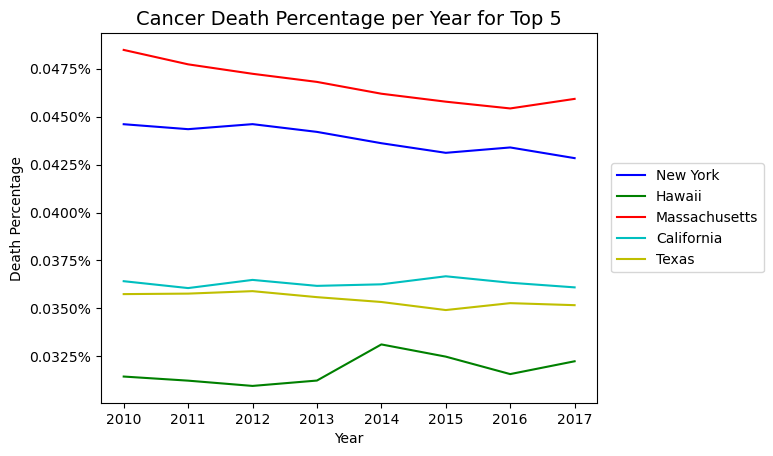

In [35]:
#Set parameters for state data
#Top 5 states for legislation passed
new_york = cancer_df.loc[cancer_df["NAME"]=="New York"]
hawaii = cancer_df.loc[cancer_df["NAME"]=="Hawaii"]
mass = cancer_df.loc[cancer_df["NAME"]=="Massachusetts"]
cali = cancer_df.loc[cancer_df["NAME"]=="California"]
texas = cancer_df.loc[cancer_df["NAME"]=="Texas"]

#Bottom 5 states for legislation passed
alaska = cancer_df.loc[cancer_df["NAME"]=="Alaska"]
wyoming = cancer_df.loc[cancer_df["NAME"]=="Wyoming"]
kansas = cancer_df.loc[cancer_df["NAME"]=="Kansas"]
s_dakota = cancer_df.loc[cancer_df["NAME"]=="South Dakota"]
n_dakota = cancer_df.loc[cancer_df["NAME"]=="North Dakota"]

#Make a line graph fot Top 5 states for cancer
plt.plot(new_york["Year"], new_york["Death Percentage"], color = "b", label = "New York")
plt.plot(hawaii["Year"], hawaii["Death Percentage"], color = "g", label = "Hawaii")
plt.plot(mass["Year"], mass["Death Percentage"], color = "r", label = "Massachusetts")
plt.plot(cali["Year"], cali["Death Percentage"], color = "c", label = "California")
plt.plot(texas["Year"], texas["Death Percentage"], color = "y", label = "Texas")
plt.title("Cancer Death Percentage per Year for Top 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

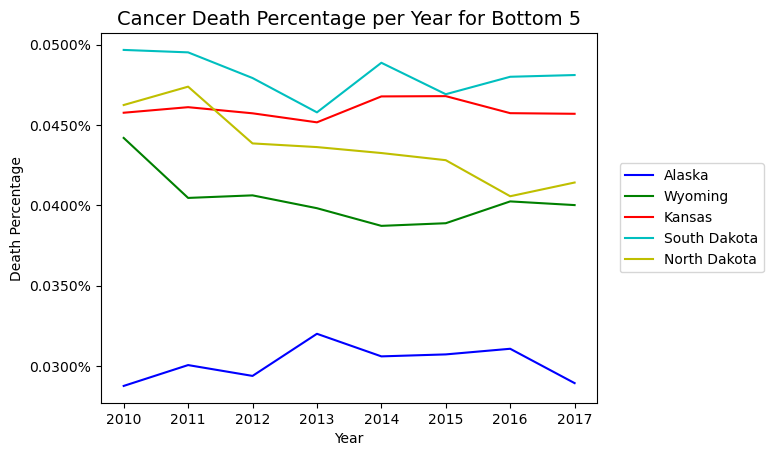

In [36]:
#Make line graph for bottom 5 states for cancer
plt.plot(alaska["Year"], alaska["Death Percentage"], color = "b", label = "Alaska")
plt.plot(wyoming["Year"], wyoming["Death Percentage"], color = "g", label = "Wyoming")
plt.plot(kansas["Year"], kansas["Death Percentage"], color = "r", label = "Kansas")
plt.plot(s_dakota["Year"], s_dakota["Death Percentage"], color = "c", label = "South Dakota")
plt.plot(n_dakota["Year"], n_dakota["Death Percentage"], color = "y", label = "North Dakota")
plt.title("Cancer Death Percentage per Year for Bottom 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

<Axes: title={'center': 'Death Percentage'}, xlabel='Year'>

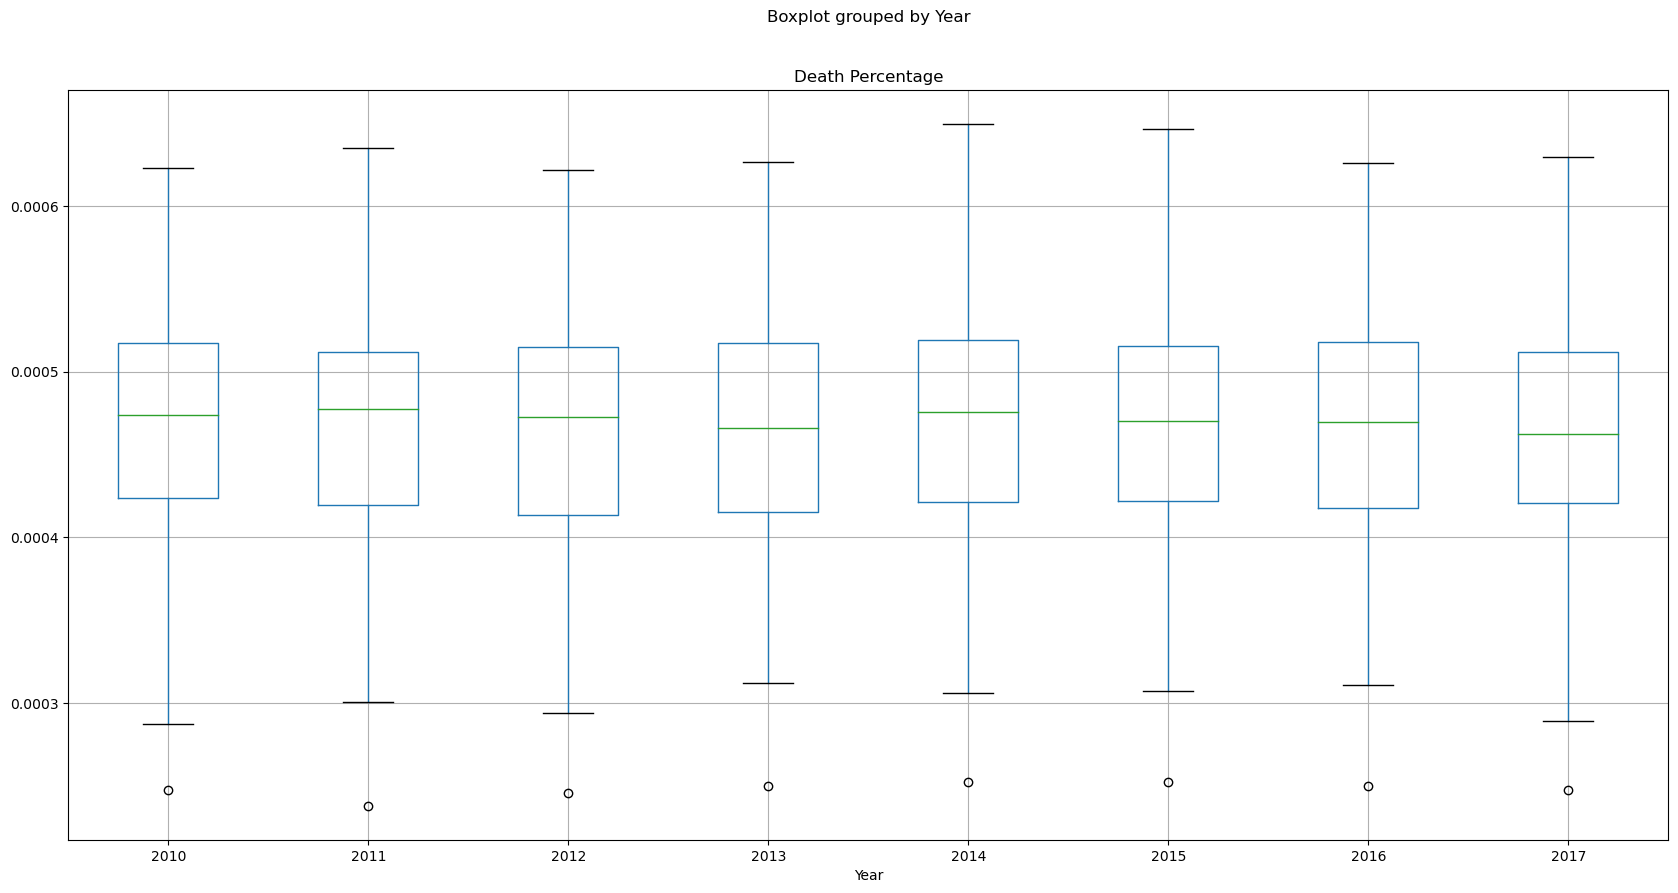

In [37]:
# Create a boxplot to compare means
cancer_df.boxplot("Death Percentage", by="Year", figsize=(20, 10))

In [38]:
#Create dataframe for the five lowest states and the five highest states for cancer
#Finding the p-value between years
lowest_df = cancer_df.loc[cancer_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = cancer_df.loc[cancer_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2010"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2010"]["Death Percentage"]

# Perform the ANOVA for 2010
stats.f_oneway(group0, group1)

F_onewayResult(statistic=0.5566065761865723, pvalue=0.47697867260660703)

In [39]:
# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2013"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2013"]["Death Percentage"]

# Perform the ANOVA for 2013
stats.f_oneway(group0, group1)

F_onewayResult(statistic=0.4128130825807703, pvalue=0.5385182659745146)

In [40]:
# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2016"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2016"]["Death Percentage"]

# Perform the ANOVA for 2016
stats.f_oneway(group0, group1)

F_onewayResult(statistic=0.48450623820000366, pvalue=0.5061035476401731)